GOAL: To create our own model for linear regression and find the R-square values between the predicted outpus and test data output.We'll then use sklearn to build the same model and verify the R-square values produced by using sklearn with the values produced from our own model without using sklearn.

We import diabetes dataset from sklearn library and do the test train split in the ratio- 20:80.



In [0]:
import numpy as np
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)

X_train = X[:-20] 
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

We basically use 3 functions here that help us in finding the optimized theta,i.e. the weight matrix by minimizing the cost function, i.e. the MSE.

The 3 functions used are: 
1. forward_propagation - It takes the initialized value of theta (weight matrix) which is typically 0 matrix, our input parameter X and number of columns in input matrix n and calculates our hypothesis h which is nothing but dot multiplication of input X and weight matrix theta.
2. gradient_descent - It requires input parameter theta (weight matrix), alpha (learning rate), epochs (number of iterations), hypothesis h (output from previous function), X (input data), y (true out values) and number of n (elements in theta ) and finally, returns the updated value of our cost function (MSE) and weight matrix (theta)
3. linear_regression - It requires input that the user needs to enter manually which are X, y, alpha (learning rate) and number of iterations.

In [0]:
def forward_propagation(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h


def gradient_descent(theta, alpha, epochs, h, X, y, n):
    cost = np.ones(epochs)
    for i in range(0,epochs):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0])*sum((h-y) * X.transpose()[j])
        h = forward_propagation(theta, X, n)
        cost[i] = (1/X.shape[0])*0.5*sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost


def linear_regression(X, y, alpha, epochs):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = forward_propagation(theta, X, n)
    theta, cost = gradient_descent(theta,alpha,epochs,h,X,y,n)
    return theta, cost


The linear regression model will be implemented

In [0]:
theta, cost = linear_regression(X_train, y_train,0.05, 40000)

now, we'll plot the error plot see how fast our algorithm basically minimizes the weight matrix.

Text(0, 0.5, 'Cost')

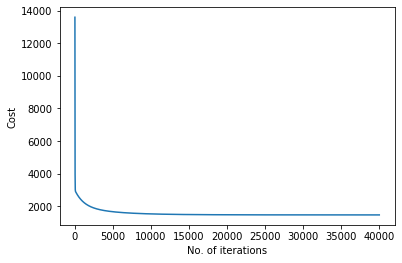

In [16]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,40001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [17]:
print(X_train.shape)  #shape of our input
print(theta.shape)    #shape of our weight matrix

(422, 10)
(1, 11)


In [22]:
#calculating the predicted output for our test input and visualizing predicted values and actual output values
n = X_test.shape[1]
one_column = np.ones((X_test.shape[0],1))
X = np.concatenate((one_column, X_test), axis = 1)
y_pred = np.dot(theta,X.T)
print(y_pred[0])
print(y_test)

[196.4509878  150.26845962 169.09365353 106.91714879 163.60581045
 133.41102723 261.45634531 100.46649337 115.02665666 121.50565954
 218.94681256  62.43560812 136.49980255 121.35936422  54.67944965
 191.58347848 105.09596755 127.34602049 207.17820865  46.67749401]
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


In [23]:
print(y_pred[0].shape)
print(y_test.shape)


(20,)
(20,)


To find: The R-square value of our model. We'll define the mean function firstly.

In [0]:
def mean(y):
  temp = 0
  for i in range(len(y)):
    temp = temp+y[i]
  return temp/len(y)

In [0]:
#define the squared error then:
def squared_error(y_test,y_pred):
    return sum((y_pred - y_test)**2)

In [0]:
#calculating the R-square value of our model:
def coefficient_of_determination(y_test,y_pred):
    y_mean_line = [mean(y_test) for y in y_test]
    squared_error_regr = squared_error(y_test, y_pred)
    variance = squared_error(y_test, y_mean_line)
    return 1 - (squared_error_regr/variance)

In [27]:
r_squared = coefficient_of_determination(y_test,y_pred[0].T)
print("R2_score from our own model :",r_squared)


R2_score from our own model : 0.5825101855093349


Verifying the R-square values using sklearn to build the regression model

In [0]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
model = regressor.fit(X_train,y_train)
prediction = regressor.predict(X_test)

In [30]:
#visualizing the predicted and the actual output 
print(prediction)
print(y_test)

[197.61846908 155.43979328 172.88665147 111.53537279 164.80054784
 131.06954875 259.12237761 100.47935157 117.0601052  124.30503555
 218.36632793  61.19831284 132.25046751 120.3332925   52.54458691
 194.03798088 102.57139702 123.56604987 211.0346317   52.60335674]
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


In [33]:
#calculating the R-square value using sklearn
from sklearn.metrics import r2_score
print("R-square value for sklearn model :",r2_score(y_test,prediction))

R-square value for sklearn model : 0.5850753022690575


Hence, we conclude by verifying that the R-square value that we get by building our own model for linear regression is almost the same value that we get by building the model using sklearn on the same dataset.